In [0]:
import numpy as np
import matplotlib.pyplot as plt


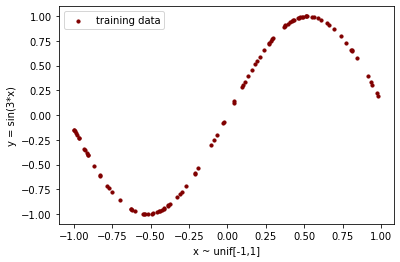

In [28]:
n=100
x_train = np.random.uniform(-1,1,(n,1))
y_train = np.sin(3*x_train) 

a=plt.scatter(x_train,y_train,c='maroon',s=10)
a.set_label('training data')
plt.xlabel('x ~ unif[-1,1]',) 
plt.ylabel('y = sin(3*x)')
plt.legend(loc='upper left')

plt.show()


In [0]:
def lr_fun(x_train,y_train):
  x_mean , y_mean = np.mean(x_train) , np.mean(y_train)
  num , den = 0, 0
  for i in range(n):
    num += (x_train[i] - x_mean) * (y_train[i] - y_mean)
    den += np.power((x_train[i] - x_mean),2)
  m = num / den
  c = y_mean - (m * x_mean), 
  return c, m

In [0]:
def mse_fun(c,m,x_train,y_train):
  mse = 0
  for i in range(n):
      y_pred=  np.dot(m,x_train[i]) + c
      mse = mse + np.power((y_train[i] - y_pred), 2)    
  mse = mse/n
  return mse


In [0]:
def plot_fun(c,m,x_train,y_train):
  y_ = np.zeros(100)
  
  for i in range(n):
    y_[i]=np.dot(m,x_train[i]) + c

  
  plt.plot(x_train, y_, '-b', label='learned line')
  b=plt.scatter(x_train,y_train,c='maroon',s=10)
  b.set_label('training data')
  plt.xlabel('x', color='red')
  plt.ylabel('y', color='purple')
  plt.legend(loc='upper left')
  plt.grid()
  plt.show()

(array([0.08013241]),) [0.98394698]
[[0.20708965]]


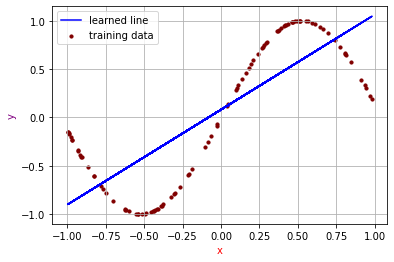

In [30]:
c,m=lr_fun(x_train,y_train)
print(c,m)
mse=mse_fun(c,m,x_train,y_train)
print(mse)
plot_fun(c,m,x_train,y_train)


In [0]:
def mse(Y, Y_pred):
    mse = np.sum(np.power((y_train - y_pred), 2))    
    mse = mse/n
    return mse

In [0]:
def w_fun(X,Y):
  w = np.zeros((n + 1, 1))
  a1=np.matmul(X.T,X)
  a=np.linalg.inv(a1)
  b=np.matmul(X.T,Y)
  w=np.matmul(a,b)
  return w

In [0]:
def phi_fun(x_train,k):
  x=x_train
  for i in range(2,k+1):
    x1=np.power(x_train,i)
    x=np.column_stack((x,x1))
  return x

for k =  1 mse error is 0.20708964859319764


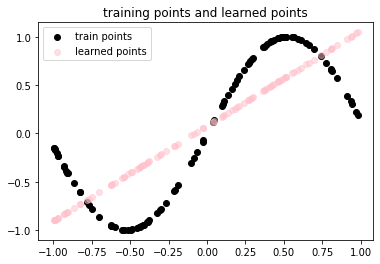

for k =  2 mse error is 0.20187927161991515


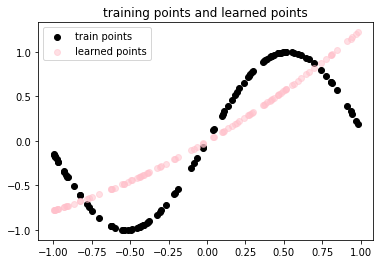

for k =  3 mse error is 0.002991192584107179


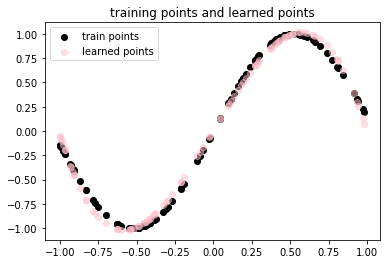

for k =  4 mse error is 0.002953968964517741


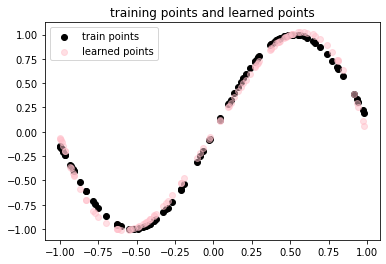

for k =  5 mse error is 1.0318480359144273e-05


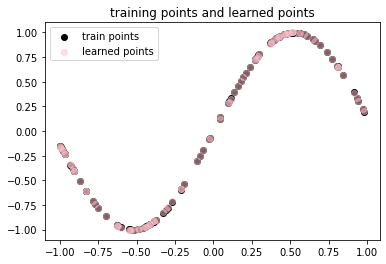

for k =  6 mse error is 1.0006533386096047e-05


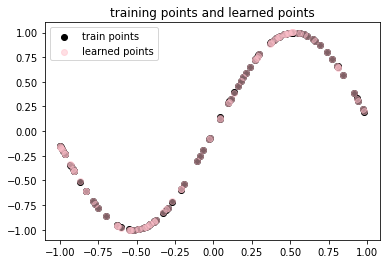

for k =  7 mse error is 1.1247712399326015e-08


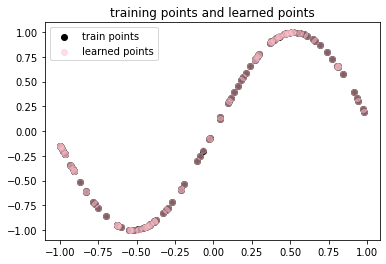

for k =  8 mse error is 1.050915059243848e-08


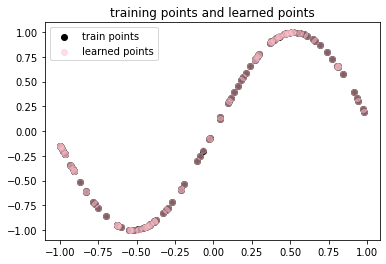

for k =  9 mse error is 4.982860037286546e-12


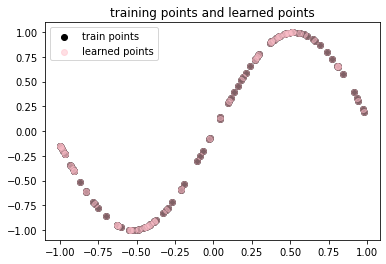

for k =  10 mse error is 4.783820008155815e-12


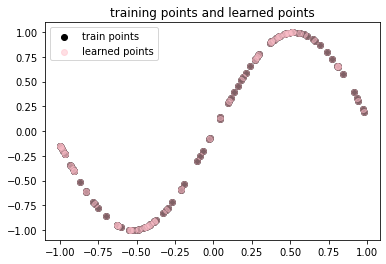

In [64]:
for k in range(1,11):
  x_train1 = x_train
  y_train1 = y_train
  x_ = phi_fun(x_train1,k)
  X  = np.hstack((np.ones((n, 1)), x_ ))
  W = w_fun(X,y_train1)
  y_pred = np.matmul(X,W)
  mserror=mse(y_pred,y_train1)
  print('for k = ', k,'mse error is', mserror)
  f_x = np.zeros(100)
  m=W[1:]
 
  for i in range(100):
    f_x[i]=np.dot(m.T,x_[i]) + W[0]
  a=plt.scatter(x_train, y_train, c='black')
  a.set_label('train points')
  b=plt.scatter(x_train, f_x, c='pink', alpha=0.5)
  b.set_label('learned points')
  plt.title('training points and learned points')
  plt.legend(loc='upper left')
  plt.show()
  #print(f_x.shape)

In [0]:
def rbf_k(x1,x2,gamma2):
  return np.exp(-gamma2 * np.linalg.norm(x1 - x2) ** 2)  

mse for iteration: 1.2619395213471602e-07 for gamma = 50000002
mse for iteration: 0.0 for gamma = 500000002


Text(0.5, 1.0, 'plot of training points and points from learned function')

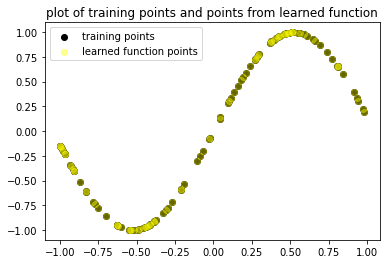

In [60]:
x3d=x_train
y3d=y_train
def train_klr(xin,yin,gamma1,j):
  x3d_p=xin
  k=j
  y3d_p=np.zeros((len(yin),1))
  for i in range(len(x3d)):
    sum1,sum2=0,0
    for j in range(len(x3d)):
     kxy=rbf_k(x3d_p[i],x3d_p[j],gamma1)
     sum1=sum1+kxy
     sum2=sum2+kxy*y3d[j]
    y3d_p[i]=sum2/sum1
  #print((y3d,y3d_p))
  mse_p = np.sqrt(np.sum(np.power((y3d - y3d_p), 2)))
  mse_d=mse_p/n
  print('mse for iteration:',mse_d,'for gamma =',gamma1)
  return mse_d,y3d_p
error = 10
gamma=50000000
i=0
while error>=0.000001:
  xt=x3d
  yt=y3d
  gamma=gamma+2
  i+=1
  error,cf=train_klr(xt,yt,gamma,i)
error_train,y_train_d=train_klr(x3d,y3d,500000002,9)

a=plt.scatter(x3d, y3d, c='black')
a.set_label('training points')
b=plt.scatter(x_train,y_train_d,c='yellow', alpha = 0.4)
b.set_label('learned function points')
plt.legend(loc='upper left')
plt.title('plot of training points and points from learned function')

In [13]:
x_test_d = np.random.uniform(-1,1,(n,1))
y_test_d = np.sin(3*x_test_d) 

error_test,y_test_d=train_klr(x_test_d,y_test_d,500000000,9)
print('train error is :', error_train,'test error is :',error_test)
#plt.scatter(x_train,y_train_dp,c='black')

mse for iteration:  9  is: 0.010106092824380162 for gamma = 500000000
train error is : 0.0 test error is : 0.010106092824380162
